In [7]:
import glob #filenames and pathnames utility
import os   #operating sytem utility
import numpy as np
import pandas as pd
import pickle
import random as rand
import sys
import glob

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
import matplotlib.gridspec as gridspec

In [8]:
data_directory = '/Users/sns9/Research/Transcription/SingleCellDistributions_2_CC/'
os.chdir(data_directory)
all_dirs = glob.glob('*Rep*')
print(all_dirs)

['Microscopy_FISH_mRNA-counts_Rep1', 'Flow_HCR_mRNA_Rep2', 'Microscopy_HCR_Protein_Rep2', 'Microscopy_HCR_TAMRA_Rep1', 'Microscopy_FISH_Protein_Rep1', 'Microscopy_HCR_mRNA-counts_Rep1', 'Microscopy_HCR_Protein_Rep3', 'Flow_HCR_mRNA_Rep3', 'Flow_FISH_Protein_Rep1', 'Microscopy_FISH_TAMRA_Rep2', 'Flow_Kan_Rep1', 'Microscopy_FISH_TAMRA_Rep3', 'Flow_FISH_mRNA_Rep1', 'Flow_HCR_Protein_Rep1', 'Flow_Chl_Rep1', 'Microscopy_FISH_mRNA-counts_Rep2', 'Microscopy_FISH_mRNA-counts_Rep3', 'Microscopy_FISH_Protein_Rep2', 'Flow_FISH_Protein_Rep3', 'Microscopy_HCR_mRNA-counts_Rep2', 'Flow_HCR_mRNA_Rep1', 'Microscopy_HCR_TAMRA_Rep2', 'Microscopy_HCR_Protein_Rep1', 'Microscopy_HCR_mRNA-counts_Rep3', 'Flow_FISH_Protein_Rep2', 'Microscopy_FISH_Protein_Rep3', 'Microscopy_HCR_TAMRA_Rep3', 'Flow_FISH_mRNA_Rep3', 'Microscopy_FISH_TAMRA_Rep1', 'Flow_Kan_Rep3', 'Flow_FISH_mRNA_Rep2', 'Flow_Kan_Rep2', 'Flow_HCR_Protein_Rep2', 'Flow_Chl_Rep2', 'Flow_Chl_Rep3', 'Flow_HCR_Protein_Rep3']


In [9]:
methods = []

for d in all_dirs:
    s = d.split('_Rep')[0]
    
    if s not in methods and 'TAMRA' not in s:
        methods.append(s)
        
methods.sort()
print(methods)

['Flow_Chl', 'Flow_FISH_Protein', 'Flow_FISH_mRNA', 'Flow_HCR_Protein', 'Flow_HCR_mRNA', 'Flow_Kan', 'Microscopy_FISH_Protein', 'Microscopy_FISH_mRNA-counts', 'Microscopy_HCR_Protein', 'Microscopy_HCR_mRNA-counts']


In [10]:
reps = ['Rep1','Rep2','Rep3']
c_data = {}

for method in methods:
    print(method)
    for rep in reps:
        data_path = data_directory+method+'_'+rep
        #os.chdir(data_directory+'_'+rep)
        
        if rep=='Rep1':
            cs = pd.read_csv(data_path+'/C_summary.csv').to_numpy()
            
            c_data[method] = np.zeros(shape=(cs.shape[0],4))
            c_data[method][:,:2] = cs
        elif rep=='Rep2':
            c_data[method][:,2] = pd.read_csv(data_path+'/C_summary.csv').to_numpy()[:,1]
        else:
            c_data[method][:,3] = pd.read_csv(data_path+'/C_summary.csv').to_numpy()[:,1]

Flow_Chl
Flow_FISH_Protein
Flow_FISH_mRNA
Flow_HCR_Protein
Flow_HCR_mRNA
Flow_Kan
Microscopy_FISH_Protein
Microscopy_FISH_mRNA-counts
Microscopy_HCR_Protein
Microscopy_HCR_mRNA-counts


In [11]:
method_names = {}

method_names['Flow_Chl'] = 'Cm Flow Protein'
method_names['Flow_FISH_Protein'] = 'FISH Flow Protein'
method_names['Flow_FISH_mRNA'] = 'FISH Flow RNA'
method_names['Flow_HCR_Protein'] = 'HCR Flow Protein'
method_names['Flow_HCR_mRNA'] = 'HCR Flow RNA'
method_names['Flow_Kan'] = 'Kn Flow Protein'

method_names['Microscopy_FISH_Protein'] = 'FISH Microscopy Protein'
#method_names['Microscopy_FISH_TAMRA'] = 'Microscopy_FISH_TAMRA'
method_names['Microscopy_FISH_mRNA-counts'] = 'FISH Microscopy RNA'
method_names['Microscopy_HCR_Protein'] = 'HCR Microscopy Protein'
#method_names['Microscopy_HCR_TAMRA'] = 'Microscopy_HCR_TAMRA'
method_names['Microscopy_HCR_mRNA-counts'] = 'HCR Microscopy RNA'

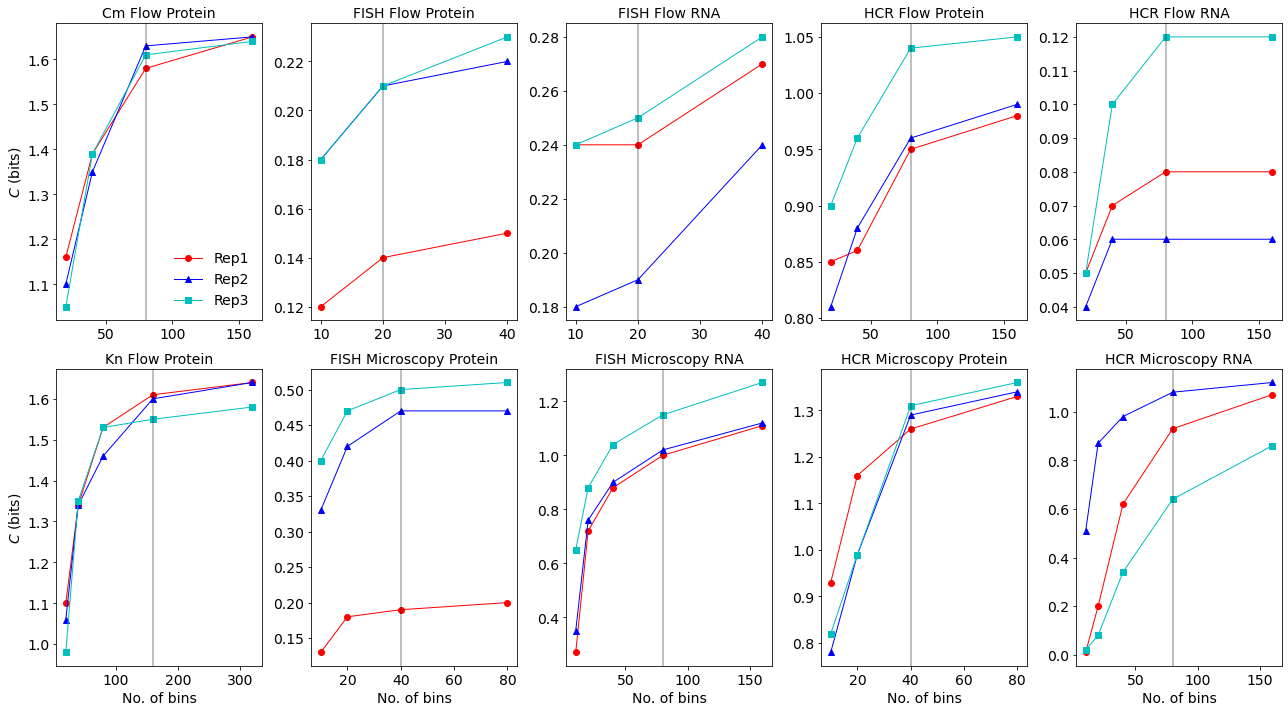

In [12]:
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(2,5)

axs = {}

for i in range(0,2):
    for j in range(0,5):
        method = methods[i*5 + j]

        axs[method] = fig.add_subplot(gs[i,j])
        if 'TAMRA' not in method:
            axs[method].plot(c_data[method][:,0],c_data[method][:,1],c='r',label='Rep1',lw=1.0,marker='o')
            axs[method].plot(c_data[method][:,0],c_data[method][:,2],c='b',label='Rep2',lw=1.0,marker='^')
            axs[method].plot(c_data[method][:,0],c_data[method][:,3],c='c',label='Rep3',lw=1.0,marker='s')
            
            axs[method].axvline(x=c_data[method][-2,0],c='black',lw=2.0,alpha=0.25)

            m_name = method.replace('_',' ')

            #if 'TAMRA' in m_name:
            #    m_name = m_name.replace('TAMRA','RNA')
            #elif 'mRNA' in m_name:
            #    m_name = m_name.replace('mRNA','RNA')

            axs[method].set_title(method_names[method],size=14)
            #axs[method].set_ylim(0,1.8)
            axs[method].tick_params(labelsize=14)

            if i==1:
                axs[method].set_xlabel('No. of bins',fontsize=14)
            if j==0:
                axs[method].set_ylabel(r'$C$ (bits)',fontsize=14)

            if i==0 and j==0:
                axs[method].legend(frameon=False,loc='lower right',fontsize=14)
            
plt.tight_layout()
plt.savefig(data_directory+'C-bin_summary.png',dpi=300)

In [ ]:
names = ['Chl Flow (protein)','Kn Flow (protein)','FISH Flow (protein)','HCR Flow (protein)','FISH Microscopy (protein)','HCR Microscopy (protein)','FISH Flow (RNA)','HCR Flow (RNA)','FISH Microscopy (RNA counts)','HCR Microscopy (RNA counts)']